In [1]:

import matplotlib.pyplot as plt
import numpy as np
import PIL
import requests
import os
import random
import pickle
import matplotlib.pyplot as plt
import tensorflow as jf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras import backend as K
import pathlib
from tensorflow.keras.callbacks import EarlyStopping


# importing Dependencies

import os
import glob
import pandas as pd 


import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import layers
import tensorflow.keras as keras


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, Dropout, concatenate,Conv2D,MaxPooling2D, Flatten,Dense,BatchNormalization

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau

from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import NASNetLarge
import os
import numpy as np
from PIL import Image
import cv2
import skimage
import numpy as np
from skimage.measure import shannon_entropy


In [2]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import shannon_entropy
count = 0
entropy_r_avg= 0
entropy_g_avg= 0
entropy_b_avg= 0


# Load a natural image
dir_path = '/kaggle/input/v5minor100/V5Minor100/Natural'

for img in os.listdir(dir_path):
    try:
        img = '/kaggle/input/v5minor100/V5Minor100/Natural/' +img
        image = cv2.imread(img, 3)
        image = cv2.resize(image, (256,256))

     

        # Calculate Shannon entropy for each channel
        entropy_r = shannon_entropy(image[:,:,0])
        entropy_g = shannon_entropy(image[:,:,1])
        entropy_b = shannon_entropy(image[:,:,2])
        entropy_r_avg += entropy_r
        entropy_g_avg += entropy_g
        entropy_b_avg += entropy_b
        count +=1
        if count == 100:
            break
    except:
        pass

# Print the results
print(count)
ravg=entropy_r_avg/count
gavg=entropy_g_avg/count
bavg=entropy_b_avg/count


100


In [3]:
print("Shannon entropy for the red channel: ", ravg)
print("Shannon entropy for the green channel: ", gavg)
print("Shannon entropy for the blue channel: ", bavg)

Shannon entropy for the red channel:  6.475444610952518
Shannon entropy for the green channel:  6.591299404299251
Shannon entropy for the blue channel:  6.548841910133652


In [4]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import shannon_entropy
count = 0
entropy_r_avgGANS= 0
entropy_g_avgGANS= 0
entropy_b_avgGANS= 0


# Load a natural image
dir_path = '/kaggle/input/v5minor100/V5Minor100/Synthetic'

for img in os.listdir(dir_path):
    try:
        img = '/kaggle/input/v5minor100/V5Minor100/Synthetic/' +img
        image = cv2.imread(img, 3)
        image = cv2.resize(image, (256,256))

     

        # Calculate Shannon entropy for each channel
        entropy_r = shannon_entropy(image[:,:,0])
        entropy_g = shannon_entropy(image[:,:,1])
        entropy_b = shannon_entropy(image[:,:,2])
        entropy_r_avgGANS += entropy_r
        entropy_g_avgGANS += entropy_g
        entropy_b_avgGANS += entropy_b
        count +=1
        if count == 100:
            break
    except:
        pass

# Print the results
print(count)
ravgGAN=entropy_r_avgGANS/count
gavgGAN=entropy_g_avgGANS/count
bavgGAN=entropy_b_avgGANS/count

100


In [5]:
print("Shannon entropy for the red channel: ", ravgGAN)
print("Shannon entropy for the green channel: ", gavgGAN)
print("Shannon entropy for the blue channel: ", bavgGAN)

Shannon entropy for the red channel:  7.0752610077349365
Shannon entropy for the green channel:  7.212415275911556
Shannon entropy for the blue channel:  7.2045331620977064


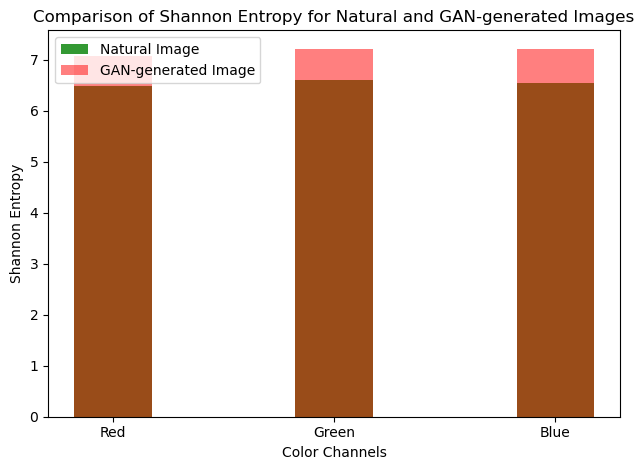

In [6]:
# Plot a bar chart of the Shannon entropy values for each channel of the two images
fig, ax = plt.subplots()
index = ['Red', 'Green', 'Blue']
bar_width = 0.35
opacity = 0.8

natural_image_entropies = [ravg, gavg, bavg]
gan_image_entropies = [ravgGAN, gavgGAN, bavgGAN]

rects1 = ax.bar(index, natural_image_entropies, bar_width,
                alpha=opacity, color='green',
                label='Natural Image')

rects2 = ax.bar(index, gan_image_entropies, bar_width,
                alpha=0.5, color='r',
                label='GAN-generated Image')

ax.set_xlabel('Color Channels')
ax.set_ylabel('Shannon Entropy')
ax.set_title('Comparison of Shannon Entropy for Natural and GAN-generated Images')
ax.set_xticks(index)
ax.set_xticklabels(('Red', 'Green', 'Blue'))
ax.legend()

plt.tight_layout()
plt.show()
